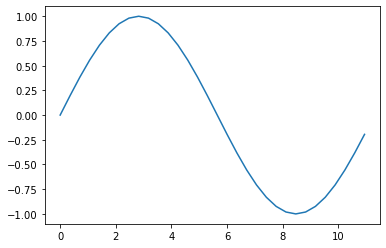

In [21]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

np.fft.fftfreq(10)

l = 11.3
N = 32
x = np.linspace(0, l, N, endpoint=False)
xx = np.arange(n) * l / N

y = np.sin(2 * np.pi * x / l)

plt.plot(x, y)


$$ y(x) = \sum_q \tilde{y}{q_n} e^{i q_n x_k} $$

$$ dy/dx = \sum_q  i q \tilde{y}{q_n} e^{i q_n x_k} $$

$$x_k = k * l / n$$

$$ q_0 = 0 $$

Periodicity: $$ e^{i q_n l} = e^0 = e^{i q_n 2l} = 1 $$

$$ q_1 l = 2 \pi n $$

$$ q_n = 2 \pi n / l $$

$$ fftfreq = n/N $$

$$ q_n =  $$

In [22]:
dy = np.cos(2 * np.pi )

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


array([-5.99180286e-16+0.00000000e+00j, -2.34291073e-15-1.60000000e+01j,
       -1.14477209e-16-1.69223765e-15j, -2.82686056e-16-2.85812167e-17j,
        7.64777365e-17-6.75658023e-16j,  1.83663700e-16-1.70574233e-15j,
       -2.06244920e-16+4.07108217e-16j, -1.14423775e-17-1.33226763e-15j,
        1.77975831e-16+4.44089210e-16j,  3.21624530e-16-5.55111512e-16j,
        1.31472513e-15-5.97671657e-16j,  1.74418187e-15+2.86753213e-16j,
        3.90496228e-16+9.89676514e-16j, -7.64777365e-17-2.81500812e-16j,
       -5.04144284e-16+4.11606946e-16j, -1.14423775e-17+0.00000000e+00j,
        2.88998134e-16+0.00000000e+00j, -1.22464680e-16+0.00000000e+00j,
       -5.04144284e-16-4.11606946e-16j, -5.52183456e-16-3.39314331e-16j,
        3.90496228e-16-9.89676514e-16j,  1.12571917e-15-2.92659116e-16j,
        1.31472513e-15+5.97671657e-16j, -1.14423775e-17+4.44089210e-16j,
        1.77975831e-16-4.44089210e-16j,  3.21624530e-16+1.44328993e-15j,
       -2.06244920e-16-4.07108217e-16j, -6.69034438

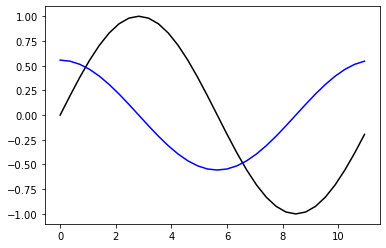

In [23]:
# y = np.heaviside(x - l/2, 0.5)

yp = np.fft.fft(y)
q = 2 * np.pi * N / l * np.fft.fftfreq(N)
dyp = q * 1j * yp
dy_from_fft = np.fft.ifft(dyp)

# plt.plot(x, dy)
plt.plot(x, y, "k-")
plt.plot(x, dy_from_fft, "b-")

yp

In [17]:
np.abs(yp)

array([5.99180286e-16, 1.60000000e+01, 1.69610533e-15, 2.84127246e-16,
       6.79972505e-16, 1.71560172e-15, 4.56370538e-16, 1.33231677e-15,
       4.78425149e-16, 6.41553684e-16, 1.44419998e-15, 1.76759661e-15,
       1.06392994e-15, 2.91704562e-16, 6.50831573e-16, 1.14423775e-17,
       2.88998134e-16, 1.22464680e-16, 6.50831573e-16, 6.48105535e-16,
       1.06392994e-15, 1.16313929e-15, 1.44419998e-15, 4.44236597e-16,
       4.78425149e-16, 1.47869137e-15, 4.56370538e-16, 1.85870365e-15,
       6.79972505e-16, 6.37216832e-16, 1.69610533e-15, 1.60000000e+01])

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import muFFT

# Define the 3D domain
L = 1.0
N = 32
x = np.linspace(0, L, N, endpoint=False)
y = np.linspace(0, L, N, endpoint=False)
z = np.linspace(0, L, N, endpoint=False)
X, Y, Z = np.meshgrid(x, y, z, indexing='ij')

# Define spherical heat sources and sinks
def spherical_heat_source_sink(X, Y, Z, L, radius=0.1):
    center_source = np.array([L/4, L/4, L/4])
    center_sink = np.array([3*L/4, 3*L/4, 3*L/4])
    source = np.exp(-np.sum((np.stack((X,Y,Z), axis=-1) - center_source) ** 2, axis=-1) / (2 * radius ** 2))
    sink = -np.exp(-np.sum((np.stack((X,Y,Z), axis=-1) - center_sink) ** 2, axis=-1) / (2 * radius ** 2))
    return source + sink

q_dot_S = spherical_heat_source_sink(X, Y, Z, L)

# Initialize muFFT
fft = muFFT.FFT((N, N, N), engine='pocketfft')

print(fft)

# Fourier transform of the heat source field
q_dot_S_hat = fft.fft(q_dot_S,)

print(q_dot_S_hat.shape)

# Define the thermal diffusivity alpha
alpha = 1.0

# Solve for the Fourier coefficients of the temperature field
kx = np.fft.fftfreq(N, d=L/N) * 2 * np.pi
ky = np.fft.fftfreq(N, d=L/N) * 2 * np.pi
kz = np.fft.fftfreq(N, d=L/N) * 2 * np.pi
KX, KY, KZ = np.meshgrid(kx, ky, kz, indexing='ij')
K2 = KX**2 + KY**2 + KZ**2
T_hat = q_dot_S_hat / (alpha * K2)
T_hat[0, 0, 0] = 0  # set the mean (DC component) to zero for simplicity

# Inverse Fourier transform to get the temperature field
T = fft.backward(T_hat)

# Plot slices through the 3D temperature field
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.pcolormesh(x, y, T[:, :, N//2])
plt.colorbar()
plt.title('Slice at z=L/2')
plt.subplot(1, 3, 2)
plt.pcolormesh(x, z, T[:, N//2, :])
plt.colorbar()
plt.title('Slice at y=L/2')
plt.subplot(1, 3, 3)
plt.pcolormesh(y, z, T[N//2, :, :])
plt.colorbar()
plt.title('Slice at x=L/2')
plt.show()


(17, 32, 32)


ValueError: operands could not be broadcast together with shapes (17,32,32) (32,32,32) 

In [ ]:
%matplotlib inline
from mpi4py import MPI
import numpy as np
import matplotlib.pyplot as plt
import muFFT

# Initialize MPI
comm = MPI.COMM_WORLD
rank = comm.Get_rank()
size = comm.Get_size()

# Define the 3D domain
L = 1.0
N = 32
local_N = N // size  # Assuming N is divisible by size
x = np.linspace(0, L, N, endpoint=False)
y = np.linspace(0, L, local_N, endpoint=False)
z = np.linspace(0, L, N, endpoint=False)
X, Y, Z = np.meshgrid(x, y + rank * local_N * (L / N), z, indexing='ij')

# Define spherical heat sources and sinks
def spherical_heat_source_sink(X, Y, Z, L, radius=0.1):
    center_source = np.array([L/4, L/4, L/4])
    center_sink = np.array([3*L/4, 3*L/4, 3*L/4])
    source = np.exp(-np.sum((np.stack((X,Y,Z), axis=-1) - center_source) ** 2, axis=-1) / (2 * radius ** 2))
    sink = -np.exp(-np.sum((np.stack((X,Y,Z), axis=-1) - center_sink) ** 2, axis=-1) / (2 * radius ** 2))
    return source + sink

q_dot_S = spherical_heat_source_sink(X, Y, Z, L)

# Initialize muFFT with MPI
fft = muFFT.FFT([N, N, N], dtype=np.float64, communicator=comm)

# Fourier transform of the heat source field
q_dot_S_hat = fft.forward(q_dot_S)

# Define the thermal diffusivity alpha
alpha = 1.0

# Solve for the Fourier coefficients of the temperature field
kx = np.fft.fftfreq(N, d=L/N) * 2 * np.pi
ky = np.fft.fftfreq(N, d=L/N) * 2 * np.pi
kz = np.fft.fftfreq(N, d=L/N) * 2 * np.pi
KX, KY, KZ = np.meshgrid(kx, ky, kz, indexing='ij')
K2 = KX**2 + KY**2 + KZ**2

# Parallel computation: broadcast the K2 array to all processes
comm.Bcast(K2, root=0)

T_hat = q_dot_S_hat / (alpha * K2)
if rank == 0:
    T_hat[0, 0, 0] = 0  # set the mean (DC component) to zero for simplicity

# Inverse Fourier transform to get the temperature field
T = fft.backward(T_hat)

# Gather the temperature field on the root process
T_global = None
if rank == 0:
    T_global = np.empty([N, N, N], dtype=np.float64)
comm.Gather(T, T_global, root=0)

# Plot slices through the 3D temperature field if root
if rank == 0:
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.pcolormesh(x, y, T_global[:, :, N//2])
    plt.colorbar()
    plt.title('Slice at z=L/2')
    plt.subplot(1, 3, 2)
    plt.pcolormesh(x, z, T_global[:, N//2, :])
    plt.colorbar()
    plt.title('Slice at y=L/2')
    plt.subplot(1, 3, 3)
    plt.pcolormesh(y, z, T_global[N//2, :, :])
    plt.colorbar()
    plt.title('Slice at x=L/2')
    plt.show()



In [ ]:
from mpi4py import MPI
import numpy as np
import matplotlib.pyplot as plt
import muFFT

# Initialize MPI
comm = MPI.COMM_WORLD
rank = comm.Get_rank()
size = comm.Get_size()

# Define the 3D domain
L = 1.0
N = 32
local_N = N // size  # Assuming N is divisible by size
x = np.linspace(0, L, N, endpoint=False)
y = np.linspace(0, L, local_N, endpoint=False)
z = np.linspace(0, L, N, endpoint=False)
X, Y, Z = np.meshgrid(x, y + rank * local_N * (L / N), z, indexing='ij')

# Define spherical heat sources and sinks
def spherical_heat_source_sink(X, Y, Z, L, radius=0.1):
    center_source = np.array([L/4, L/4, L/4])
    center_sink = np.array([3*L/4, 3*L/4, 3*L/4])
    source = np.exp(-np.sum((np.stack((X,Y,Z), axis=-1) - center_source) ** 2, axis=-1) / (2 * radius ** 2))
    sink = -np.exp(-np.sum((np.stack((X,Y,Z), axis=-1) - center_sink) ** 2, axis=-1) / (2 * radius ** 2))
    return source + sink

q_dot_S = spherical_heat_source_sink(X, Y, Z, L)

# Initialize muFFT with MPI
fft = muFFT.FFT([N, N, N], dtype=np.float64, communicator=comm)

# Fourier transform of the heat source field
q_dot_S_hat = fft.forward(q_dot_S)

# Define the thermal diffusivity alpha
alpha = 1.0

# Solve for the Fourier coefficients of the temperature field
kx = np.fft.fftfreq(N, d=L/N) * 2 * np.pi
ky = np.fft.fftfreq(N, d=L/N) * 2 * np.pi
kz = np.fft.fftfreq(N, d=L/N) * 2 * np.pi
KX, KY, KZ = np.meshgrid(kx, ky, kz, indexing='ij')
K2 = KX**2 + KY**2 + KZ**2

# Parallel computation: broadcast the K2 array to all processes
comm.Bcast(K2, root=0)

T_hat = q_dot_S_hat / (alpha * K2)
if rank == 0:
    T_hat[0, 0, 0] = 0  # set the mean (DC component) to zero for simplicity

# Inverse Fourier transform to get the temperature field
T = fft.backward(T_hat)

# Gather the temperature field on the root process
T_global = None
if rank == 0:
    T_global = np.empty([N, N, N], dtype=np.float64)
comm.Gather(T, T_global, root=0)

# Plot slices through the 3D temperature field if root
if rank == 0:
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.pcolormesh(x, y, T_global[:, :, N//2])
    plt.colorbar()
    plt.title('Slice at z=L/2')
    plt.subplot(1, 3, 2)
    plt.pcolormesh(x, z, T_global[:, N//2, :])
    plt.colorbar()
    plt.title('Slice at y=L/2')
    plt.subplot(1, 3, 3)
    plt.pcolormesh(y, z, T_global[N//2, :, :])
    plt.colorbar()
    plt.title('Slice at x=L/2')
    plt.show()
